<a href="https://colab.research.google.com/github/Guliko24/NetZoo_network/blob/main/GRN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# This is a block of code working with single files from MCF7 and MDA-MB-231 cell lines



In [1]:
#import all the packages as needed
import pandas as pd
import networkx as nx

In [2]:
# prompt: let's load Gdrive onto notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Navigate to your Google Drive files
%cd /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


In [34]:
#let's read the MCF7_TF_Genes dataset and make changes
df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)

In [5]:
#let's do initial data assessment
df_MCF7_TF_Genes.head()


,Row,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,TMEM88,TMEM88B,TMEM89,TMEM8B,TMEM9,TMEM91,TMEM92,TMEM94,TMEM95,TMEM97
0,AHR,-1.443279,-1.967447,-2.760445,-2.073087,1.251514,0.385485,-1.715180,2.865040,0.034788,...,-0.878857,0.459640,1.375959,-1.016009,-0.242322,1.891062,-0.818321,-0.052743,-0.473725,-0.298555
1,AHRR,-1.247997,-2.028449,-2.831273,-1.976606,1.202019,0.408661,-1.723908,2.810044,0.225790,...,-0.761727,0.619967,1.403784,-0.775855,-0.152985,1.974241,-0.680559,0.012663,-0.332161,-0.117967
2,AIRE,-1.380017,2.783954,1.011333,3.807602,-3.535072,-1.611140,1.657074,-1.797554,-1.676323,...,-1.082261,-1.291455,-1.956019,-0.419732,-0.210442,-1.207542,-0.703877,-1.442472,-0.474597,-0.882657
3,ALX1,-2.001329,3.642444,-0.656243,0.632257,0.204571,-0.584100,1.287642,0.738631,-1.492440,...,-1.472459,-1.322024,-0.123587,-2.152722,-2.204323,-0.050309,-2.532883,-0.852312,-2.007539,-1.760582
4,ALX3,-1.201413,0.550952,-0.211441,0.657875,-0.089130,-0.913549,0.404178,0.546880,-1.522372,...,-2.399966,-1.392676,0.684690,-2.412815,-2.458452,0.413145,-2.533361,-1.395355,-2.138298,-2.579043


In [6]:
df_MCF7_TF_Genes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Columns: 16384 entries, Row to TMEM97
dtypes: float64(16383), object(1)
memory usage: 141.5+ MB


In [7]:
print(df_MCF7_TF_Genes.describe())

              A1BG         A1CF          A2M        A2ML1      A3GALT2  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000   
mean     -0.199907     0.095889    -0.012865    -0.094739     0.198359   
std       1.678212     1.799404     2.252995     1.607752     2.163127   
min      -2.760505    -2.629948    -4.034686    -2.626029    -9.267207   
25%      -1.401818    -1.327776    -1.436337    -1.112496    -0.999215   
50%      -0.648784    -0.230834    -0.423527    -0.377356     0.317033   
75%       0.629196     1.019549     0.892078     0.498847     1.661686   
max      12.642667    10.412639    13.711460    12.098564     6.186273   

            A4GALT        A4GNT         AAAS         AACS        AADAC  ...  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000  ...   
mean     -0.024695     0.086092     0.334350    -0.159868     0.029493  ...   
std       1.389114     1.512006     2.696839     1.433202     1.316912  ...   
min      -3.45439

In [8]:
print(df_MCF7_TF_Genes.isnull().sum())

Row       0
A1BG      0
A1CF      0
A2M       0
A2ML1     0
         ..
TMEM91    0
TMEM92    0
TMEM94    0
TMEM95    0
TMEM97    0
Length: 16384, dtype: int64


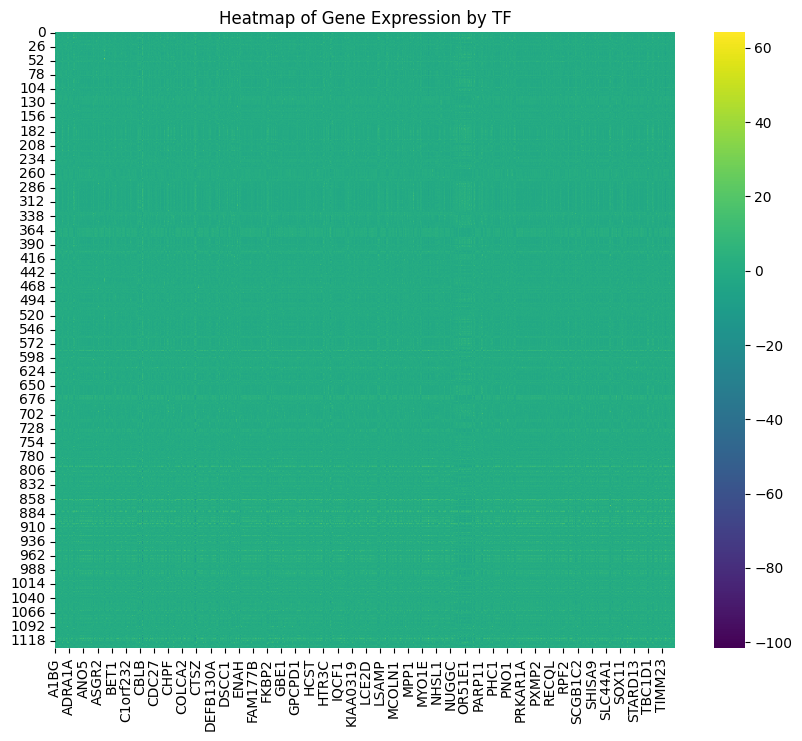

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_MCF7_TF_Genes.iloc[:, 1:], cmap='viridis')  # Skipping the first column if it's TF names
plt.title('Heatmap of Gene Expression by TF')
plt.show()


#let's convert CTCF-genes file into some adjancy matrix for future use

---


In [36]:
import numpy as np
import pandas as pd

def normalize_matrix(matrix: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize the values in the matrix to a range of [0, 1].
    """
    normalized_matrix = (matrix - matrix.min().min()) / (matrix.max().max() - matrix.min().min())
    return normalized_matrix

def filter_by_threshold(matrix: pd.DataFrame, threshold: float, mode: str = 'greater') -> pd.DataFrame:
    """
    Filter the matrix based on a threshold.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        threshold: The threshold value for filtering.
        mode: 'greater' to keep values greater than threshold, 'less' to keep values less than threshold.
    """
    if mode == 'greater':
        return matrix[matrix > threshold].fillna(0)
    elif mode == 'less':
        return matrix[matrix < threshold].fillna(0)
    else:
        raise ValueError("Mode must be either 'greater' or 'less'")

def binarize_matrix(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Binarize the matrix based on a threshold.
    Values greater than or equal to the threshold become 1, otherwise 0.
    """
    binary_matrix = (matrix >= threshold).astype(int)
    return binary_matrix

def rank_interactions(matrix: pd.DataFrame, top_n: int = 5) -> pd.DataFrame:
    """
    Rank the top N interactions for each transcription factor.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        top_n: Number of top interactions to return for each TF.
    """
    ranked_interactions = pd.DataFrame()
    for tf in matrix.index:
        top_genes = matrix.loc[tf].nlargest(top_n)
        ranked_interactions = pd.concat([ranked_interactions, top_genes], axis=1)
    return ranked_interactions.T

def aggregate_interactions(matrix: pd.DataFrame, axis: int = 0) -> pd.Series:
    """
    Aggregate interaction strengths.
    Parameters:
        axis: 0 to aggregate across genes (per TF), 1 to aggregate across TFs (per Gene).
    """
    return matrix.sum(axis=axis)

def construct_interaction_network(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Construct an interaction network by keeping only interactions above a threshold.
    Returns a DataFrame representing edges in the network.
    """
    filtered_matrix = filter_by_threshold(matrix, threshold, mode='greater')
    edges = []
    for tf in filtered_matrix.index:
        for gene in filtered_matrix.columns:
            if filtered_matrix.loc[tf, gene] > 0:
                edges.append((tf, gene, filtered_matrix.loc[tf, gene]))
    network_df = pd.DataFrame(edges, columns=['TF', 'Gene', 'Interaction_Strength'])
    return network_df

def split_positive_negative_matrices(matrix: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Split the matrix into two DataFrames: one for positive values and one for negative values.
    Ensure that the matrix values are numeric by coercing errors and replacing non-numeric values with NaN.
    Retain the index and columns in both matrices.
    """
    matrix_numeric = matrix.apply(pd.to_numeric, errors='coerce')
    positive_matrix = matrix_numeric.where(matrix_numeric > 0).fillna(0)
    negative_matrix = matrix_numeric.where(matrix_numeric < 0).fillna(0)
    positive_matrix.index = matrix.index
    positive_matrix.columns = matrix.columns
    negative_matrix.index = matrix.index
    negative_matrix.columns = matrix.columns
    return positive_matrix, negative_matrix


In [37]:
# Example Usage
# Read the TF vs Genes matrix from a CSV file
#df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)

# Normalize the matrix
#normalized_df = normalize_matrix(df_MCF7_TF_Genes)

# Filter interactions greater than 0.5
#filtered_df = filter_by_threshold(df_MCF7_TF_Genes, threshold=0.5, mode='greater')

# Binarize the matrix with a threshold of 0.5
#binary_df = binarize_matrix(df_MCF7_TF_Genes, threshold=0.5)

# Rank top 2 interactions for each TF
#ranked_df = rank_interactions(df_MCF7_TF_Genes, top_n=2)

# Aggregate interactions across genes (per TF)
#aggregated_series = aggregate_interactions(df_MCF7_TF_Genes, axis=1)

# Construct interaction network with a threshold of 0.5
#network_df = construct_interaction_network(df_MCF7_TF_Genes, threshold=0.5)

# Split the matrix into positive and negative interaction matrices
positive_df, negative_df = split_positive_negative_matrices(df_MCF7_TF_Genes)

In [38]:
positive_df.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,TMEM88,TMEM88B,TMEM89,TMEM8B,TMEM9,TMEM91,TMEM92,TMEM94,TMEM95,TMEM97
Row,,,,,,,,,,,,,,,,,,,,,
AHR,0.0,0.000000,0.000000,0.000000,1.251514,0.385485,0.000000,2.865040,0.034788,0.000000,...,0.0,0.459640,1.375959,0.0,0.0,1.891062,0.0,0.000000,0.0,0.0
AHRR,0.0,0.000000,0.000000,0.000000,1.202019,0.408661,0.000000,2.810044,0.225790,0.000000,...,0.0,0.619967,1.403784,0.0,0.0,1.974241,0.0,0.012663,0.0,0.0
AIRE,0.0,2.783954,1.011333,3.807602,0.000000,0.000000,1.657074,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
ALX1,0.0,3.642444,0.000000,0.632257,0.204571,0.000000,1.287642,0.738631,0.000000,2.054034,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
ALX3,0.0,0.550952,0.000000,0.657875,0.000000,0.000000,0.404178,0.546880,0.000000,0.821050,...,0.0,0.000000,0.684690,0.0,0.0,0.413145,0.0,0.000000,0.0,0.0


In [39]:
negative_df

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,TMEM88,TMEM88B,TMEM89,TMEM8B,TMEM9,TMEM91,TMEM92,TMEM94,TMEM95,TMEM97
Row,,,,,,,,,,,,,,,,,,,,,
AHR,-1.443279,-1.967447,-2.760445,-2.073087,0.000000,0.000000,-1.715180,0.000000,0.000000,-1.152120,...,-0.878857,0.000000,0.000000,-1.016009,-0.242322,0.000000,-0.818321,-0.052743,-0.473725,-0.298555
AHRR,-1.247997,-2.028449,-2.831273,-1.976606,0.000000,0.000000,-1.723908,0.000000,0.000000,-1.189913,...,-0.761727,0.000000,0.000000,-0.775855,-0.152985,0.000000,-0.680559,0.000000,-0.332161,-0.117967
AIRE,-1.380017,0.000000,0.000000,0.000000,-3.535072,-1.611140,0.000000,-1.797554,-1.676323,-1.153214,...,-1.082261,-1.291455,-1.956019,-0.419732,-0.210442,-1.207542,-0.703877,-1.442472,-0.474597,-0.882657
ALX1,-2.001329,0.000000,-0.656243,0.000000,0.000000,-0.584100,0.000000,0.000000,-1.492440,0.000000,...,-1.472459,-1.322024,-0.123587,-2.152722,-2.204323,-0.050309,-2.532883,-0.852312,-2.007539,-1.760582
ALX3,-1.201413,0.000000,-0.211441,0.000000,-0.089130,-0.913549,0.000000,0.000000,-1.522372,0.000000,...,-2.399966,-1.392676,0.000000,-2.412815,-2.458452,0.000000,-2.533361,-1.395355,-2.138298,-2.579043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN31,0.000000,-1.814879,-1.906737,-1.091507,0.000000,0.000000,-0.628054,0.000000,0.000000,-1.031869,...,0.000000,0.000000,0.000000,-1.474306,0.000000,0.000000,0.000000,0.000000,-0.724492,-0.482245
ZSCAN4,-0.574789,-0.157441,0.000000,-0.438078,0.000000,-0.301469,-0.089882,-0.210761,-0.424703,0.000000,...,-0.340126,-0.793296,-0.461062,-0.801028,-1.081565,-0.185078,-0.170766,-0.586690,0.000000,-1.189845
ZSCAN5A,-0.352297,-1.245130,0.000000,0.000000,-2.184980,-0.642928,-1.681611,-1.513285,0.000000,0.000000,...,0.000000,0.000000,-1.200345,0.000000,0.000000,0.000000,0.000000,-0.514664,0.000000,0.000000


In [10]:
# Create a directed graph with weights directly from the edge list
G = nx.from_pandas_edgelist(df_MCF7, source='Source', target='Target', edge_attr='Edge weight', create_using=nx.DiGraph())

# Check the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

NameError: name 'df_MCF7' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Set a layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [ ]:
#let's try running another file with TF-genes


In [ ]:
# Create a directed graph with weights directly from the edge list
G = nx.from_pandas_edgelist(df_MCF7_all_TF, source='Source', target='Target', edge_attr='Edge weight', create_using=nx.DiGraph())

# Check the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

In [ ]:
import matplotlib.pyplot as plt

# Set a layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Set a layout for the graph
pos = nx.spring_layout(G)

# Separate the nodes into "Source" and "Target"
source_nodes = set(df_MCF7_all_TF['Source'])
target_nodes = set(df_MCF7_all_TF['Target'])

# Draw the source nodes in pink
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=source_nodes, node_color="pink", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=target_nodes, node_color="blue", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
edge_labels = nx.get_edge_attributes(G, 'Edge weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Set a layout for the graph, using edge weights to influence node positioning
pos = nx.spring_layout(G, k=0.8, iterations=50)  # 'weight' parameter will consider edge weights

# Separate the nodes into "Source" and "Target"
source_nodes = set(df_MCF7_all_TF['Source'])
target_nodes = set(df_MCF7_all_TF['Target'])

# Draw the source nodes in pink
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=source_nodes, node_color="pink", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=target_nodes, node_color="blue", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
edge_labels = nx.get_edge_attributes(G, 'Edge weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()
